In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.coordinates import SkyCoord
import astropy.units as u
from scipy.stats import gaussian_kde
import cmasher
from exod.post_processing.cluster_regions import ClusterRegions
from exod.utils.plotting import plot_aitoff_density
from exod.utils.path import savepaths_combined
import scienceplots
plt.style.use('science')

In [16]:
df_regions = pd.read_csv(savepaths_combined['regions'])
df_dc      = pd.read_csv(savepaths_combined['dc_info'])

In [3]:
cluster_regions = ClusterRegions(df_regions, clustering_radius=20 * u.arcsec)
cluster_regions.run()
df_regions_unique = cluster_regions.df_regions_unique

Initially found 32553 unique region clusters...
Final number of unique regions = 32247
Renumbering clusters...
Saving unique regions table to /home/nkhan/EXOD2/data/results_combined/merged_with_dr14/df_regions_unique.csv
Initially found 32553 unique region clusters...
Final number of unique regions = 32247
Renumbering clusters...
Saving unique regions table to /home/nkhan/EXOD2/data/results_combined/merged_with_dr14/df_regions_unique.csv


In [17]:
df_regions_soft = df_regions[df_regions['runid'].str.contains('0.2_2.0')]
df_regions_hard = df_regions[df_regions['runid'].str.contains('0.2_12.0')]

In [18]:
df_regions_soft

,label,bbox-0,bbox-1,bbox-2,bbox-3,centroid-0,centroid-1,weighted_centroid-0,weighted_centroid-1,intensity_mean,...,area_bbox,x_img,y_img,X,Y,ra,dec,ra_deg,dec_deg,runid
0,0,32,22,33,23,32.000000,22.000000,32.000000,22.000000,12.0,...,1.0,200.930233,130.604651,16074.418605,10448.372093,0h39m12.29s,-43d49m30.54s,9.801227,-43.825151,0911990501_0_5_0.2_2.0
1,1,40,31,41,32,40.000000,31.000000,40.000000,31.000000,135.0,...,1.0,241.116279,175.813953,19289.302326,14065.116279,0h38m57.42s,-43d46m30.02s,9.739232,-43.775004,0911990501_0_5_0.2_2.0
2,2,45,77,46,78,45.000000,77.000000,45.000000,77.000000,211.0,...,1.0,266.232558,406.883721,21298.604651,32550.697674,0h38m48.05s,-43d31m05.87s,9.700222,-43.518297,0911990501_0_5_0.2_2.0
3,3,74,71,75,72,74.000000,71.000000,74.000000,71.000000,156.0,...,1.0,411.906977,376.744186,32952.558140,30139.534884,0h37m54.46s,-43d33m06.26s,9.476927,-43.551739,0911990501_0_5_0.2_2.0
4,4,78,57,79,58,78.000000,57.000000,78.000000,57.000000,135.0,...,1.0,432.000000,306.418605,34560.000000,24513.488372,0h37m47.02s,-43d37m47.42s,9.445900,-43.629838,0911990501_0_5_0.2_2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60112,0,8,28,9,29,8.000000,28.000000,8.000000,28.000000,43.0,...,1.0,135.627907,210.976744,10850.232558,16878.139535,9h57m47.71s,69d34m01.71s,149.448806,69.567141,0932391001_0_50_0.2_2.0
60113,1,15,44,16,45,15.000000,44.000000,15.000000,44.000000,246.0,...,1.0,170.790698,291.348837,13663.255814,23307.906977,9h57m21.34s,69d39m24.43s,149.338923,69.656786,0932391001_0_50_0.2_2.0
60114,2,38,47,40,49,38.666667,47.666667,38.644984,47.830938,39725.0,...,4.0,289.565502,310.592617,23165.240189,24847.409381,9h55m50.27s,69d40m43.72s,148.959454,69.678812,0932391001_0_50_0.2_2.0
60117,0,37,45,38,46,37.000000,45.000000,37.000000,45.000000,6453.0,...,1.0,281.302326,296.372093,22504.186047,23709.767442,9h55m56.59s,69d39m46.78s,148.985793,69.662993,0932391001_0_200_0.2_2.0


Text(0, 0.5, 'bti_frac')

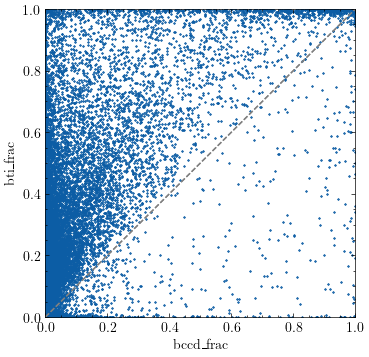

In [19]:
plt.figure(figsize=(4,4))
plt.scatter(df_dc['bccd_frac'], df_dc['bti_frac'], s=0.5, marker='.')
plt.plot([[0,0],[1,1]], color='grey', lw=1.0, ls='--')
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('bccd_frac')
plt.ylabel('bti_frac')